# Image analysis grid

In [1]:
# imports

import os
import numpy as np
from skimage import io
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set up folders
imageDataDir = 'C:\\Users\\tequi\\Documents\\repos\\sudoku_dataset\\images\\'

allImages = []
for file in os.listdir(imageDataDir):
    if file.endswith(".jpg"):
        allImages.append(file)

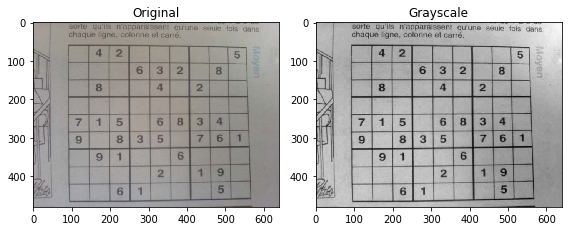

In [3]:
#open image1
idxToOpen = 1
filename = os.path.join(imageDataDir, allImages[idxToOpen])
imgOr = io.imread(filename)
img = rgb2gray(imgOr)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(imgOr)
ax[0].set_title("Original")
ax[1].imshow(img, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

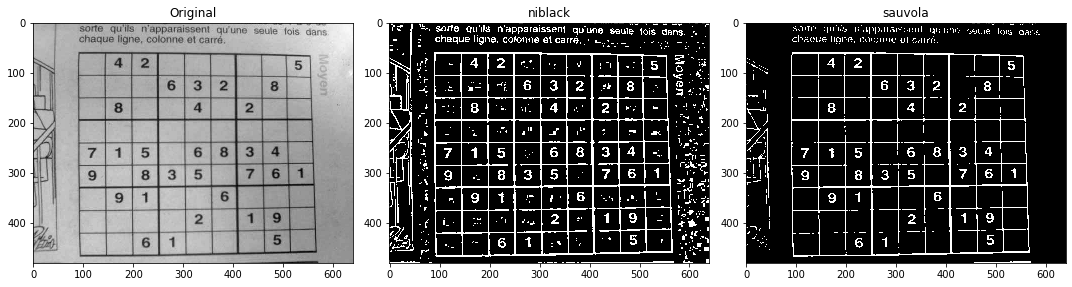

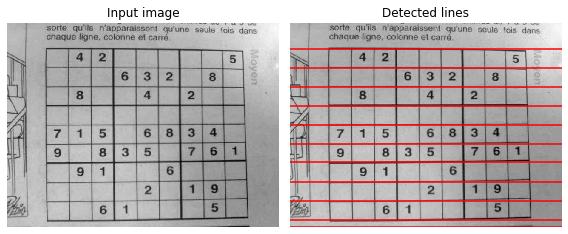

In [4]:
# binary
from skimage.filters import threshold_niblack, threshold_sauvola

window_size = 25
k = 0.8
thresh_niblack = threshold_niblack(img, window_size=window_size, k=k)
thresh_sauvola = threshold_sauvola(img, window_size=window_size)

binary_niblack = img < thresh_niblack
binary_sauvola = img < thresh_sauvola

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title("Original")
ax[1].imshow(binary_niblack, cmap=plt.cm.gray)
ax[1].set_title("niblack")
ax[2].imshow(binary_sauvola, cmap=plt.cm.gray)
ax[2].set_title("sauvola")

fig.tight_layout()
plt.show()



# hough
# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 10)

from skimage.transform import hough_line, hough_line_peaks
h, theta, d = hough_line(binary_niblack, theta=tested_angles)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(img, cmap=plt.cm.gray)
origin = np.array((0, img.shape[1]))
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[1].plot(origin, (y0, y1), '-r')
ax[1].set_xlim(origin)
ax[1].set_ylim((img.shape[0], 0))
ax[1].set_axis_off()
ax[1].set_title('Detected lines')

plt.tight_layout()
plt.show()

[194.62163852407753, 194.6216385240775]
[150.5941213258286, 150.59412132582858]
[239.6497811131958, 239.64978111319576]
[327.7048155096934, 327.70481550969333]
[105.56597873671035, 105.5659787367103]
[61.53846153846143, 61.53846153846139]
[284.6779237023138, 284.67792370231376]
[479.79987492182613, 479.7998749218261]
[464.79049405878663, 464.7904940587866]
[374.73420888055034, 374.7342088805503]
[419.7623514696684, 419.7623514696683]


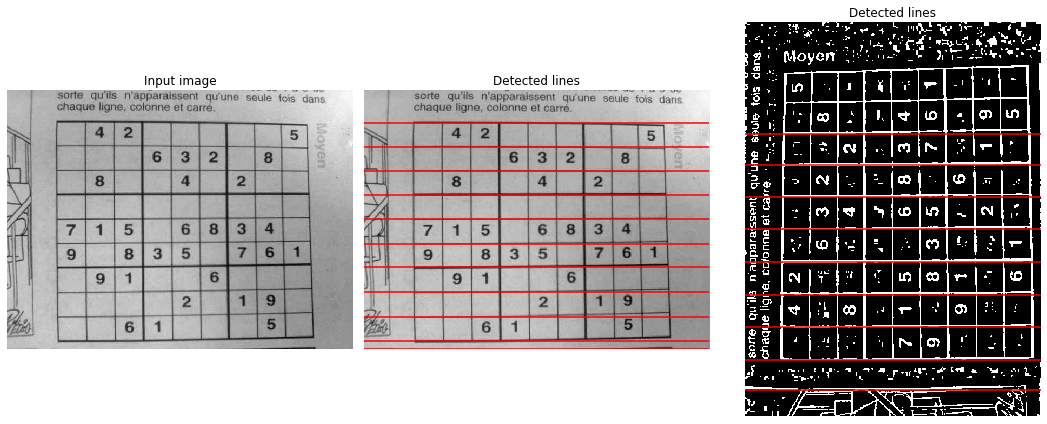

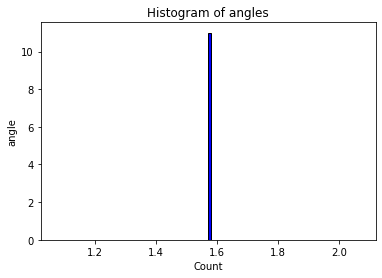

In [20]:
angles = []
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    angles.append(angle)
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    print([y0, y1])

# try to rotate img 90deg and repeat to get vertical lines
# then combine
from skimage.transform import rotate
#image = data.camera()

imgR = rotate(binary_niblack, 90, resize=True)

# hough
# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 10)

from skimage.transform import hough_line, hough_line_peaks
hR, thetaR, dR = hough_line(imgR, theta=tested_angles)

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(img, cmap=plt.cm.gray)
origin = np.array((0, img.shape[1]))
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[1].plot(origin, (y0, y1), '-r')
ax[1].set_xlim(origin)
ax[1].set_ylim((img.shape[0], 0))
ax[1].set_axis_off()
ax[1].set_title('Detected lines')

ax[2].imshow(imgR, cmap=plt.cm.gray)
origin = np.array((0, imgR.shape[1]))
for _, angle, dist in zip(*hough_line_peaks(hR, thetaR, dR)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')
ax[2].set_xlim(origin)
ax[2].set_ylim((imgR.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()



#print(len(angles))
plt.hist(angles, color = 'blue', edgecolor = 'black',
         bins = 100)

plt.title('Histogram of angles')
plt.xlabel('Count')
plt.ylabel('angle')
plt.show()

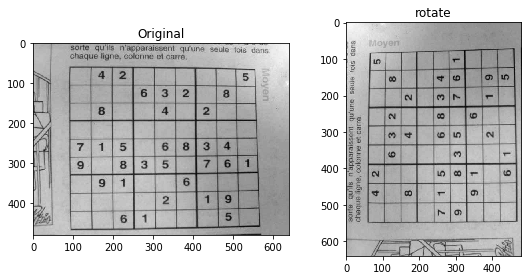

In [17]:
from skimage import data
from skimage.transform import rotate
#image = data.camera()

imgR = rotate(img, 90, resize=True)


fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title("Original")
ax[1].imshow(imgR, cmap=plt.cm.gray)
ax[1].set_title("rotate")

fig.tight_layout()
plt.show()